In [1]:
# !pip uninstall -y py-openaq

In [2]:
# pip list

In [3]:
# pip install openaq

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
# from openaq import OpenAQ
# import pandas as pd

# client = OpenAQ(api_key='b878aacfcb4340bad05b580bfc2bbe021ea88c3ad7556af3947a139a75c1e018')
# response = client.measurements.list(locations_id=289, date_from="2020-01-01", date_to="2021-01-01")
# data_dict = response.dict()
# df = pd.json_normalize(data_dict['results'])
# df.info()

In [7]:
# import requests

# url = "https://api.openaq.org/v2/measurements?date_from=2017-01-01&date_to=2023-01-01&limit=10001&page=1&offset=0&sort=desc&radius=1000&location_id=289&order_by=datetime"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)#789

# print(response.text)

In [8]:
# df1 = pd.json_normalize(response.json()['results'])

In [9]:
# import requests

# url = "https://api.openaq.org/v2/measurements?date_from=2023-01-02&date_to=2024-06-03&limit=10001&page=1&offset=0&sort=desc&radius=1000&location_id=289&order_by=datetime"

# headers = {"accept": "application/json"}

# response = requests.get(url, headers=headers)#789

# print(response.text)

In [10]:
# df2 = pd.json_normalize(response.json()['results'])

In [11]:
# aq = pd.concat([df1, df2])

In [12]:
# aq = aq.reset_index()

In [13]:
# aq = aq[aq['parameter']=='pm25']

In [14]:
# aq.info()

In [15]:
# aq.to_csv(f'data/openaqpm2.5')

In [16]:
aq = pd.read_csv('data/openaqpm2.5')

In [17]:
# aq['date.local'] = pd.to_datetime(aq['date.local'])#, utc=True)

aq['date'] = pd.to_datetime(aq['date.local'],utc=True).dt.tz_convert("America/New_York").dt.tz_localize(None)

aq['date'] = aq['date'].dt.date

aq[18:20]

,Unnamed: 0,index,locationId,location,parameter,value,unit,country,city,isMobile,isAnalysis,entity,sensorType,date.utc,date.local,coordinates.latitude,coordinates.longitude,date
18,18,18,289,LOCKELAND,pm25,1.0,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-05T00:00:00+00:00,2022-12-04T18:00:00-06:00,36.1767,-86.7386,2022-12-04
19,19,19,289,LOCKELAND,pm25,1.0,µg/m³,US,NaN,False,NaN,Governmental Organization,reference grade,2022-12-04T23:00:00+00:00,2022-12-04T17:00:00-06:00,36.1767,-86.7386,2022-12-04


In [18]:
average_concentration = aq.groupby(['date'])['value'].mean().round(2).reset_index()
average_concentration

,date,value
0,2019-11-18,8.59
1,2019-11-19,10.60
2,2019-11-20,8.69
3,2019-11-21,11.95
4,2019-11-22,10.88
...,...,...
759,2024-05-13,8.86
760,2024-05-14,7.59
761,2024-05-15,5.29
762,2024-05-16,7.65


In [19]:
# PM25 = pd.read_csv('../Air_Quality_and_Pollen_Count.csv')

In [20]:
# PM25 = PM25[PM25['Responsible Pollutant']=='PM2.5'].reset_index()

In [21]:
# PM25['Date'] = pd.to_datetime(PM25['Date'], format = 'mixed')

In [22]:
# pm25 = PM25[PM25['Date']>='01/01/2017'].reset_index()

In [23]:
# # https://data.nashville.gov/dataset/Air-Quality-and-Pollen-Count/h7nh-qj2m/data
# pm25

In [24]:
# pm25.to_csv(f'data/nashville.gov_pm2.5')

In [25]:
pm25 = pd.read_csv('data/nashville.gov_pm2.5')

In [26]:
pm25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1764 non-null   int64  
 1   level_0                1764 non-null   int64  
 2   index                  1764 non-null   int64  
 3   Date                   1764 non-null   object 
 4   Air Quality Index      1764 non-null   float64
 5   Responsible Pollutant  1764 non-null   object 
 6   Pollen Count           1020 non-null   float64
 7   Pollen Type            1002 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 110.4+ KB


In [27]:
date_aqi = pm25.groupby(['Date'])['Air Quality Index'].mean().reset_index()
date_aqi = date_aqi.set_axis(['date','aqi'], axis='columns')
date_aqi['date'] = pd.to_datetime(date_aqi['date']).dt.date
date_aqi

,date,aqi
0,2017-01-01,29.0
1,2017-01-02,27.0
2,2017-01-03,18.0
3,2017-01-04,19.0
4,2017-01-05,19.0
...,...,...
1744,2024-06-01,51.0
1745,2024-06-02,49.0
1746,2024-06-03,50.0
1747,2024-06-04,47.0


In [28]:
# pd.set_option('display.max_rows', None)
# pm25['Date'].value_counts().reset_index().sort_values(by='Date')

In [29]:
traffic = pd.read_csv('data/Traffic_Accidents_20240605.csv', low_memory=False)

In [30]:
traffic['Date and Time'] = pd.to_datetime(traffic['Date and Time']).dt.date

In [31]:
traffic = traffic[0:184623]

In [32]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184623 entries, 0 to 184622
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident Number             184623 non-null  float64
 1   Date and Time               184623 non-null  object 
 2   Year                        184623 non-null  float64
 3   Month                       184623 non-null  object 
 4   Hour                        184623 non-null  float64
 5   Weekday                     184623 non-null  object 
 6   Number of Motor Vehicles    184622 non-null  float64
 7   Single or Multiple          184623 non-null  object 
 8   Number of Injuries          184623 non-null  float64
 9   Number of Fatalities        184623 non-null  float64
 10  Property Damage             14047 non-null   object 
 11  Hit and Run                 184609 non-null  object 
 12  Reporting Officer           184612 non-null  float64
 13  Collision Type

In [33]:
traffic.head()

,Accident Number,Date and Time,Year,Month,Hour,Weekday,Number of Motor Vehicles,Single or Multiple,Number of Injuries,Number of Fatalities,Property Damage,Hit and Run,Reporting Officer,Collision Type Code,Collision Type Description,Weather Code,Weather Description,Illumination Code,Illumination Description,Harmful Code,Harmful Description,Street Address,City,State,ZIP,RPA,Precinct,Latitude,Longitude,Mapped Location
0,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,1.0,single,0.0,0.0,NaN,True,212336.0,9.0,UNKNOWN,2.0,RAIN,2.0,DARK - NOT LIGHTED,99,UNKNOWN MOST HARMFUL EVENT,MARSDEN AV & STRATFORD AV,NASHVILLE,TN,37216.0,1407.0,EAST,36.2004,-86.7170,POINT (-86.717 36.2004)
1,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,2.0,multiple,0.0,0.0,NaN,True,109536.0,4.0,ANGLE,2.0,RAIN,3.0,DARK - LIGHTED,14,PARKED MOTOR VEHICLE,SKYLINE MEMORIAL CT & I65 S EXT RAMP,MADISON,TN,37115.0,2009.0,MADISO,36.2454,-86.7512,POINT (-86.7512 36.2454)
2,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,2.0,multiple,1.0,0.0,NaN,False,206675.0,4.0,ANGLE,2.0,RAIN,2.0,DARK - NOT LIGHTED,12,MOTOR VEHICLE IN TRANSPORT,10TH AVS & HALCYON AV,NASHVILLE,TN,37204.0,6927.0,MIDTOW,36.1224,-86.7865,POINT (-86.7865 36.1224)
3,2.017001e+10,2017-01-01,2017.0,January,0.0,Sunday,1.0,single,0.0,0.0,True,True,226092.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,99.0,UNKNOWN,9.0,UNKNOWN,38,FENCE,12TH AVN & COCKRILL ST,NASHVILLE,TN,37208.0,4473.0,NORTH,36.1765,-86.8032,POINT (-86.8032 36.1765)
4,2.017000e+10,2017-01-01,2017.0,January,0.0,Sunday,1.0,single,0.0,0.0,True,True,224529.0,0.0,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,2.0,RAIN,9.0,UNKNOWN,30,UTILITY POLE,I24 W EXT RAMP & I 24,NASHVILLE,TN,37211.0,8829.0,SOUTH,36.1074,-86.7197,POINT (-86.7197 36.1074)


In [34]:
avg_injury_by_date = traffic.groupby(['Date and Time'])['Number of Injuries'].mean().reset_index()
avg_injury_by_date

,Date and Time,Number of Injuries
0,2017-01-01,0.414141
1,2017-01-02,0.333333
2,2017-01-03,0.491525
3,2017-01-04,0.500000
4,2017-01-05,0.364706
...,...,...
2706,2024-05-30,0.862069
2707,2024-05-31,0.857143
2708,2024-06-01,0.617647
2709,2024-06-02,0.892857


In [35]:
accident_count = traffic['Date and Time'].value_counts().reset_index().sort_values(by='Date and Time').reset_index()
# accident_count = accident_count.drop(accident_count[1].index)
accident_count.drop(accident_count.columns[0],axis=1,inplace=True)
accident_count = accident_count.set_axis(['date','count'], axis='columns')
accident_count['avg_injury'] = avg_injury_by_date['Number of Injuries']
accident_count

,date,count,avg_injury
0,2017-01-01,99,0.414141
1,2017-01-02,69,0.333333
2,2017-01-03,118,0.491525
3,2017-01-04,78,0.500000
4,2017-01-05,85,0.364706
...,...,...,...
2706,2024-05-30,29,0.862069
2707,2024-05-31,28,0.857143
2708,2024-06-01,34,0.617647
2709,2024-06-02,28,0.892857


In [36]:
accidents_v_concentration = accident_count.merge(date_aqi, on='date')
accidents_v_concentration

,date,count,avg_injury,aqi
0,2017-01-01,99,0.414141,29.0
1,2017-01-02,69,0.333333,27.0
2,2017-01-03,118,0.491525,18.0
3,2017-01-04,78,0.500000,19.0
4,2017-01-05,85,0.364706,19.0
...,...,...,...,...
1742,2024-05-28,27,0.592593,50.0
1743,2024-05-29,32,0.687500,50.0
1744,2024-06-01,34,0.617647,51.0
1745,2024-06-02,28,0.892857,49.0


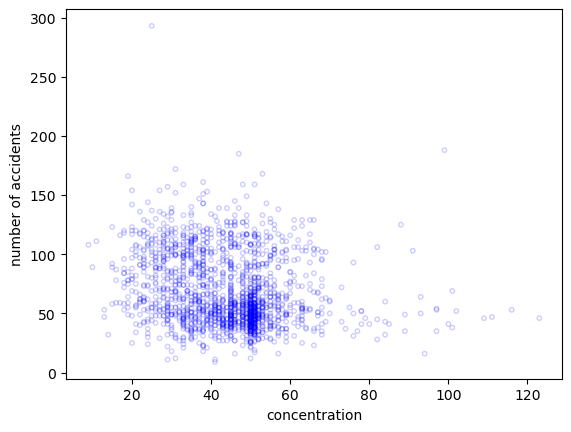

In [37]:
x = accidents_v_concentration['aqi']
y = accidents_v_concentration['count']

# warning = y>50

# plt.scatter(x[~warning], y[~warning], s=1, alpha=.5, label='unacceptable', facecolors='none', edgecolors='b')
plt.scatter(x, y, s=10, alpha=0.2, label='acceptable', facecolors='none', edgecolors='b')

plt.xlabel("concentration")
plt.ylabel("number of accidents")

plt.show()

In [38]:
from scipy import stats
stats.pearsonr(accidents_v_concentration['aqi'], accidents_v_concentration['count'])

PearsonRResult(statistic=-0.21892736662199633, pvalue=2.1124909858528656e-20)

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

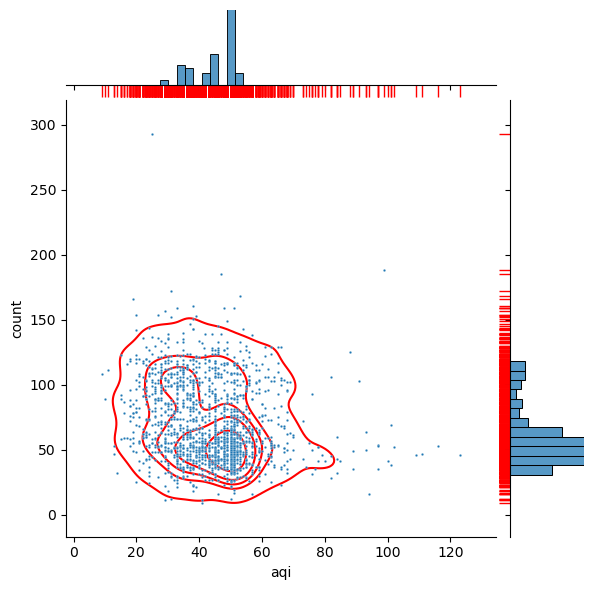

In [39]:
plot = sns.jointplot(x="aqi", y="count",data=accidents_v_concentration, s=3)
plot.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
plot.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# hue="avg_injury",

C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


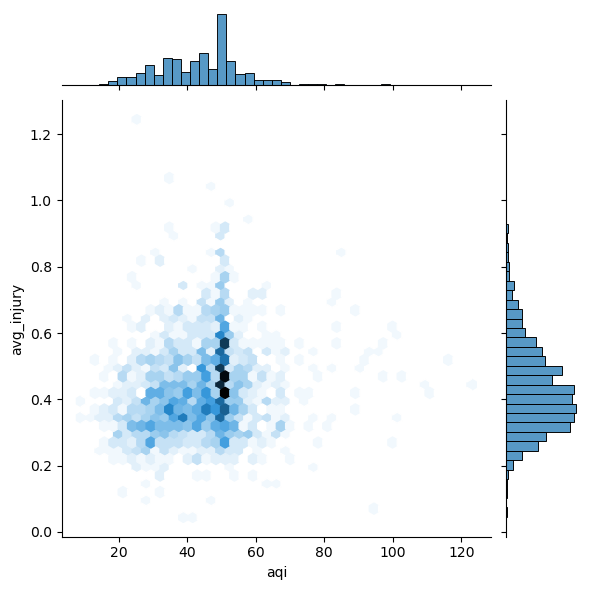

In [40]:
sns.jointplot(x="aqi", y="avg_injury", data=accidents_v_concentration, kind='hex')